In [1]:
import plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib2tikz import save as tikz_save

%matplotlib inline

## Speedup as a function of the number of GPUs

In [3]:
def get_speedups(times):
    t1 = times[0]
    return [t1/t for t in times]

In [73]:
gpus = [1,2,4]
times = [356.420000, 212.990762, 76.724623]
speedups = get_speedups(times)

In [79]:
n_nodes = gpus
lines = [speedups]

xlabel = 'Number of GPUs'
ylabel = 'speedup'

filename = 'strong-mpi.svg'

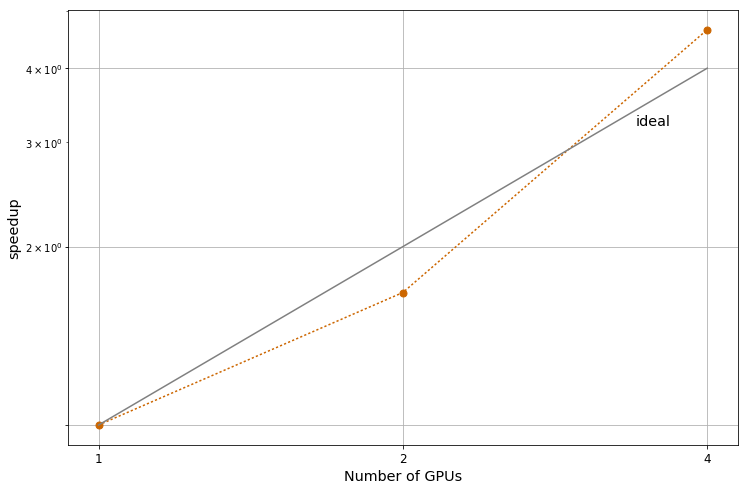

In [133]:
import matplotlib.ticker as mtick


plt.figure(figsize=(12,8))
plt.grid()

# colormap
n_lines = len(lines)
line_colors = [plotting.colorblind_palette_dict[plotting.palette_order[i%plotting.n_colors]] 
               for i in range(n_lines)]

# plot lines
for i,tts in enumerate(lines):
    plt.plot(n_nodes, tts, 
             color=line_colors[i], linestyle=plotting.linestyles[i%plotting.n_linestyles], 
             marker=plotting.markers[i%plotting.n_markers],
             markerfacecolor=line_colors[i], 
             markersize=7)

plt.plot(n_nodes, n_nodes, color=plotting.ideal_color)
plt.text(n_nodes[-2]+1.4, n_nodes[-2]+1.2, 'ideal', fontsize='x-large')

# x-axis
plt.xscale('log', basex=2)
plt.xticks(n_nodes, fontsize='large')
plt.xlabel(xlabel, fontsize='x-large')

# y-axis
plt.yscale('log', basex=2)
plt.yticks(n_nodes)
plt.ylabel(ylabel, fontsize='x-large')

# ticks formatting
ax = plt.gca()
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax.yaxis.set_major_formatter(ScalarFormatter())
formatter = mtick.ScalarFormatter()
labels = [formatter(x) for x in [1,2,4]]
ax.set_yticklabels(labels)

# tikz_save(filename, figureheight='\\figureheight', figurewidth='\\figurewidth')
plt.savefig(filename)

plt.show()

## Time to solution for a fixed problem for each implementation

In [134]:
machines = ['sequential', '1 processor - 1 GPU', '2 processors - 2 GPUs', '2 processors - 4 GPUs']
values = [180921.57, 356.42, 212.99, 76.72]
values_lists = [values]

In [135]:
xlabel = 'Machine'
ylabel = 'Time to solution [s]'
filename = 'strong-tts.svg'

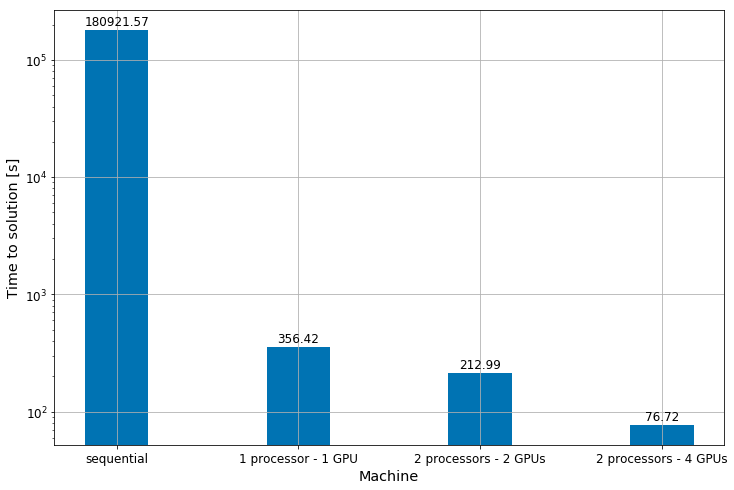

In [136]:
plt.figure(figsize=(12,8))
plt.grid()

# colormap
n_labels = 1
bar_colors = []
bar_colors = [plotting.colorblind_palette_dict[plotting.palette_order2[i%plotting.n_colors]] 
              for i in range(n_labels)]

# plot bars -- label by label
width = 0.35
n_machines = len(machines)
x_values = np.arange(1, n_machines+1)
max_value = max(values)
for i in range(1):
    plt.bar(x_values+i*width, values, width, align='center', color=bar_colors[i])
    for idx, v in enumerate(sorted(values_lists[i], reverse=True)):
        plt.text(idx+1+i*width, 1.1*v, str(v), fontsize='large', horizontalalignment='center')

# x-axis
plt.xticks(x_values+(n_labels-1)*width/2, machines, fontsize='large')
plt.xlabel(xlabel, fontsize='x-large')

# y-axis
plt.yscale('log')
plt.yticks(fontsize='large')
plt.ylabel(ylabel, fontsize='x-large')

# ticks formatting
ax = plt.gca()
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())

plt.savefig(filename)
plt.show()